# Tarea semanal 7
## Martín Deleón

### Consignas:
Ejercicio 1:

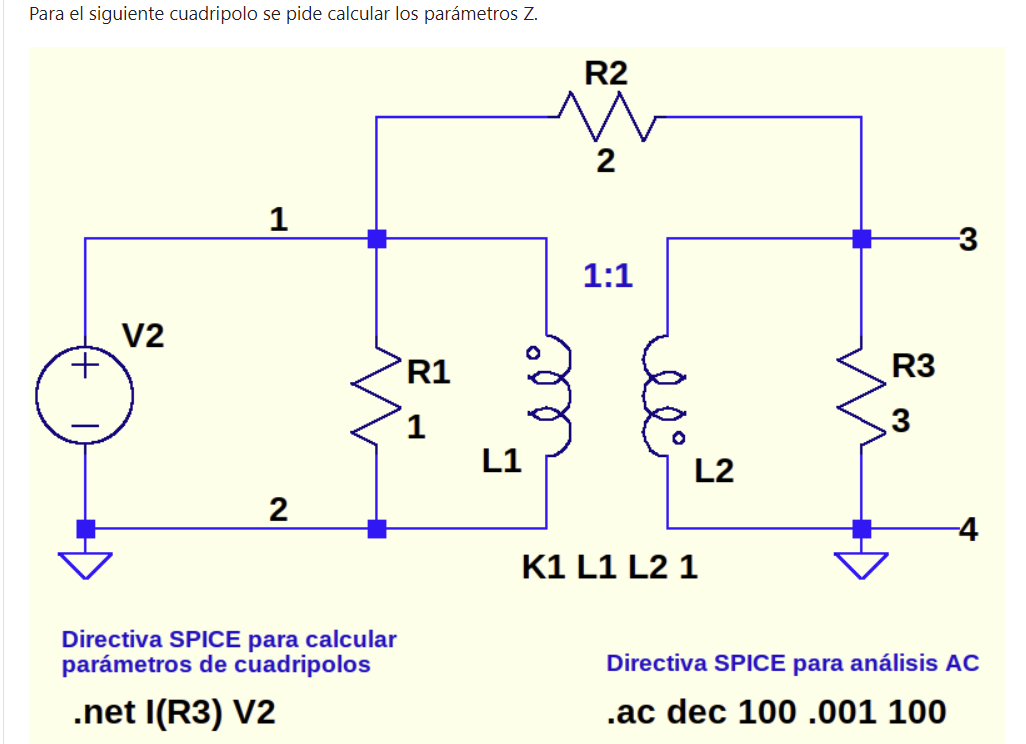

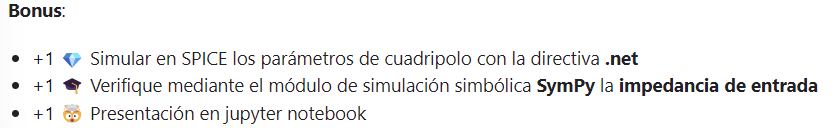

Ejercicio 2:

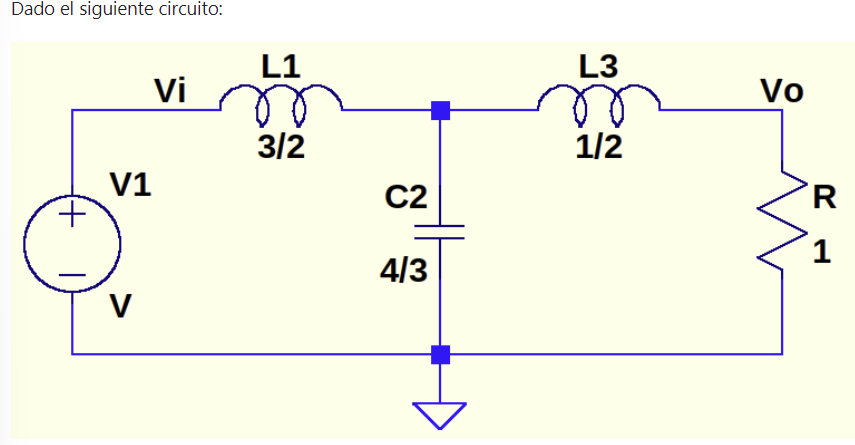

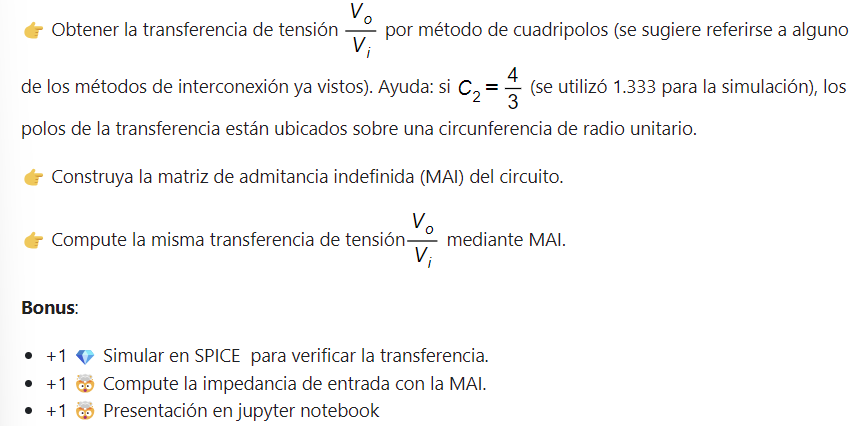

### Desarrollo en papel

In [9]:
from IPython.display import IFrame
IFrame("./TS7.pdf", width=1000, height=1000)

### Ejercicio 1

#### Simulación numérica:


In [1]:
## Inserte codigo
import sympy as sp
from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn, Z2Tabcd_s
from pytc2.general import print_latex
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

a, R1, L1, L2, R2, R3 = sp.symbols('a, R1, L1, L2, R2, R3', complex=True)

Ttrafo = sp.Matrix([[-a, 0], [0, -1/a]])

Tr1=sp.Matrix([[1, 0], [1/R1, 1]])

Tr2=sp.Matrix([[1, 0], [1/R3, 1]])

Tcascada= Tr1*Ttrafo*Tr2


print_latex(a_equal_b_latex_s('T_{cascada}', Tcascada))

Zcascada=Z2Tabcd_s(Tcascada)

print_latex(a_equal_b_latex_s('Z_{cascada}', Zcascada))

## Transformamos la Z en una T que tiene R2 como puente

za=Zcascada[0,0]-Zcascada[0,1]
zc=za
zb=Zcascada[0,1]

z11=((R2+zc)*za)/((R2+zc+za))+zb
z22=z11
z12=-z11
z21=z12

Zfinal=sp.Matrix([[z11, z12],[z21, z22]])
print_latex(a_equal_b_latex_s('Z_{final}', Zfinal))

Znum=Zfinal.subs({a: 1, R1: 1, R2: 2,R3: 3})
print_latex(a_equal_b_latex_s('Z_{final}', Znum))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Simulación circuital:

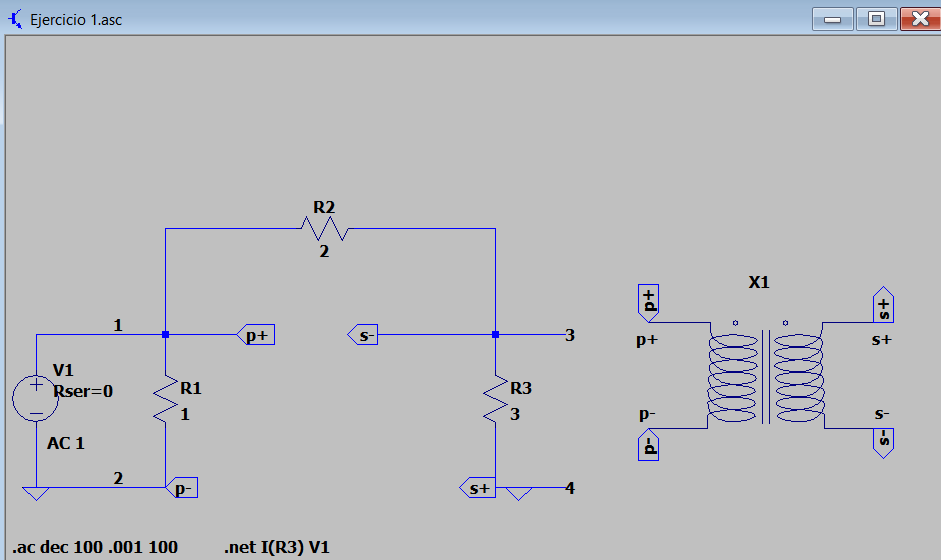

Mediante el uso de la directiva de spice ".net" podemos obtener los parámetros del cuadripolo.

##### Z11

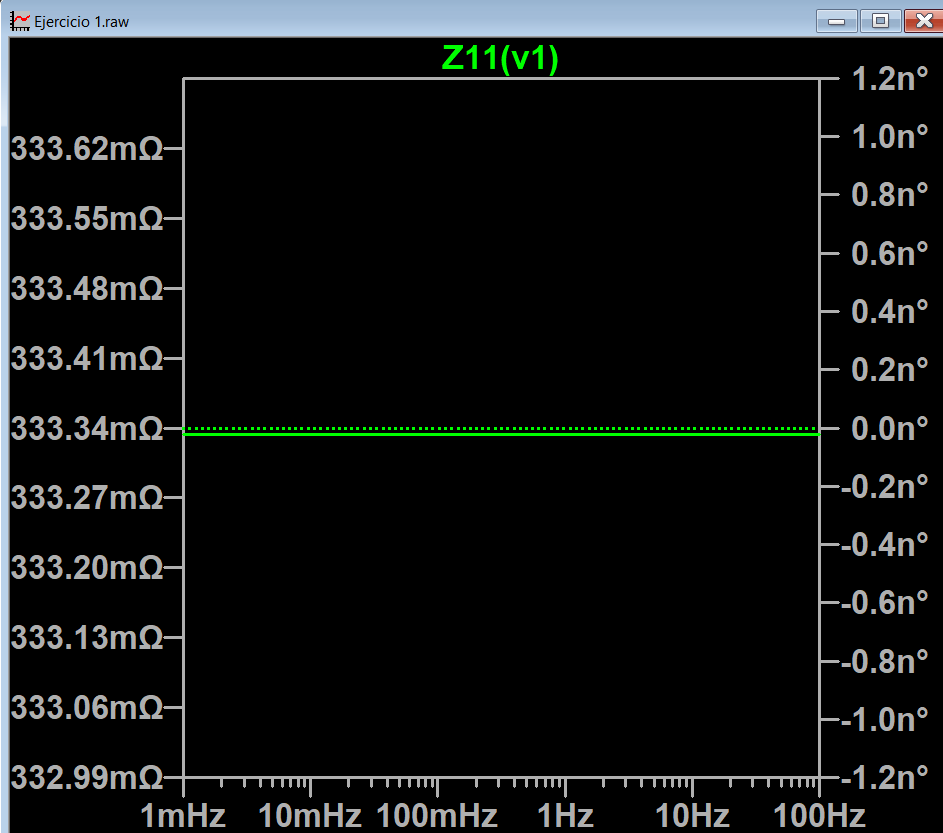

##### Z12

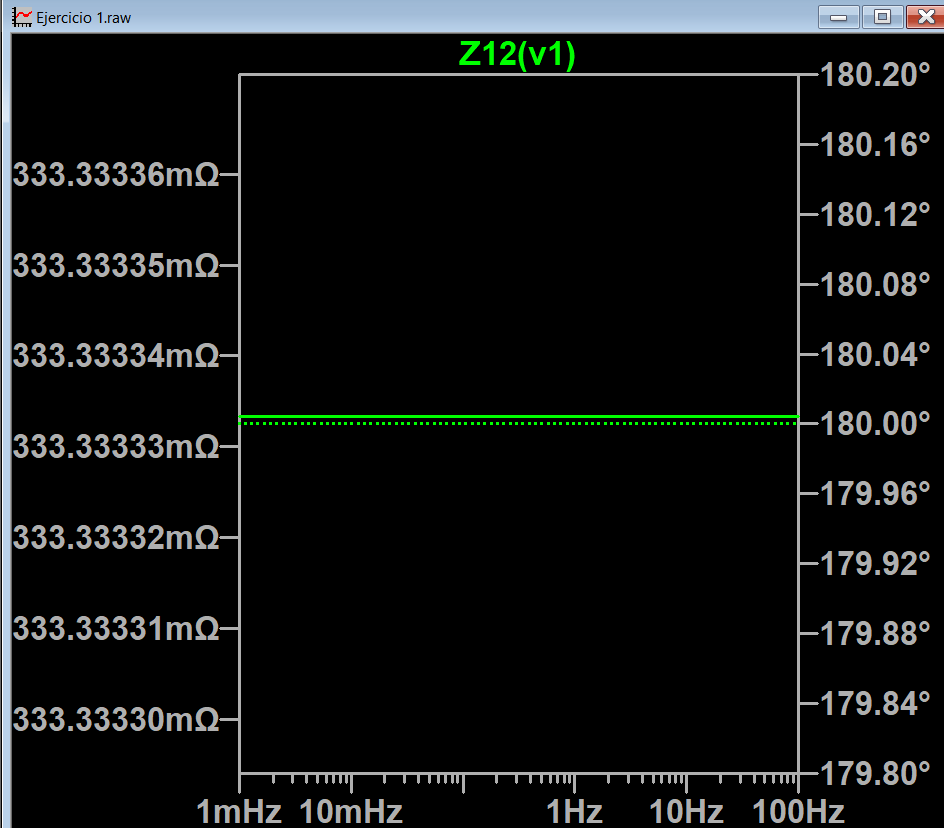

##### Z21

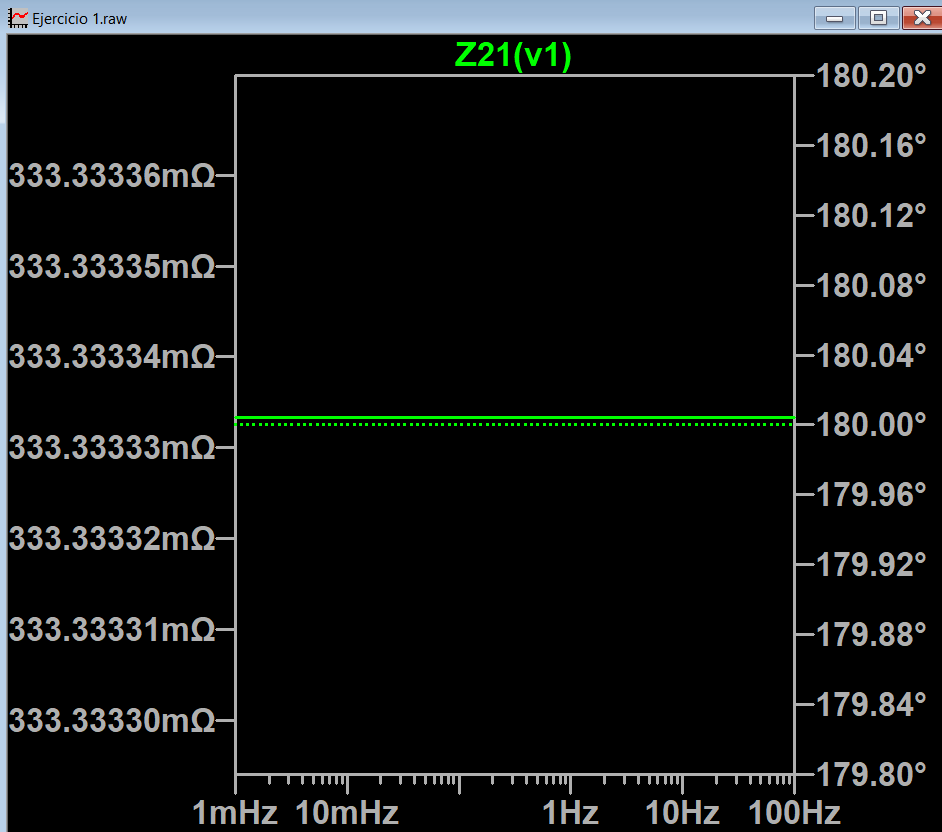

##### Z22

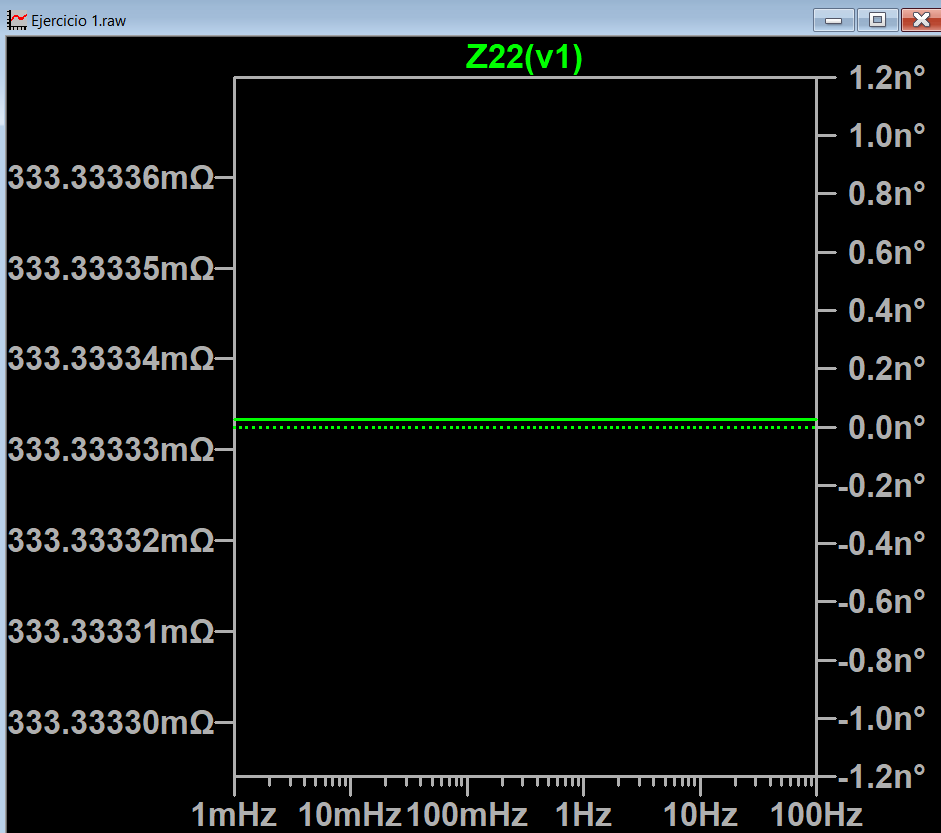


Podemos ver que estos valores coinciden con los obtenidos en papel. Aunque con una diferencia que por lo hablado en clase todavía no se sabe de donde sale. Todos los parámetros deberían dar 0,3 o en su defecto 300mohm. Sin embargo vemos que no es esto lo que nos da el spice.

### Ejercicio 2

#### Simulación numérica:


In [2]:
## Librerias
import sympy as sp

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex, a_equal_b_latex_s

## Definición de las variables simbólicas
s = sp.symbols('s', complex=True)
L1, C2, L3, G = sp.symbols('L1 C2 L3 G', real=True, positive=True)

In [3]:
## Defino la matriz de admitancias indefinidas

Ymai = sp.Matrix([
                    [1/(s*L1),          0,                  -1/(s*L1),                   0],
                    [0,            1/(s*L3) + G,            -1/(s*L3),                  -G],
                    [-1/(s*L1),     -1/(s*L3),      s*C2 + 1/(s*L3) + 1/(s*L1),      -s*C2],
                    [0,                -G,                    -s*C2,             G + s*C2 ],
                ])

print_latex(sp.latex(Ymai))

<IPython.core.display.Math object>

In [4]:
#Podemos pedirle que lo haga con detalles:

con_detalles = False

Vmai = calc_MAI_vtransf_ij_mn( Ymai, 1, 3, 0, 3, verbose=con_detalles)


print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(3, 1, 0, 1) +  sp.latex(sp.simplify(Vmai)))

Zmai = calc_MAI_impedance_ij(Ymai, 0, 1, verbose=False)
print_latex(a_equal_b_latex_s('Z_{entrada}', Zmai))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Podemos ver que si sacamos factor comun lo que acompaña al termino de mayor orden en el denominador obtenemos la misma transferencia que en el papel.

## Simulacion circuital
El cicuito planteado es el siguiente:

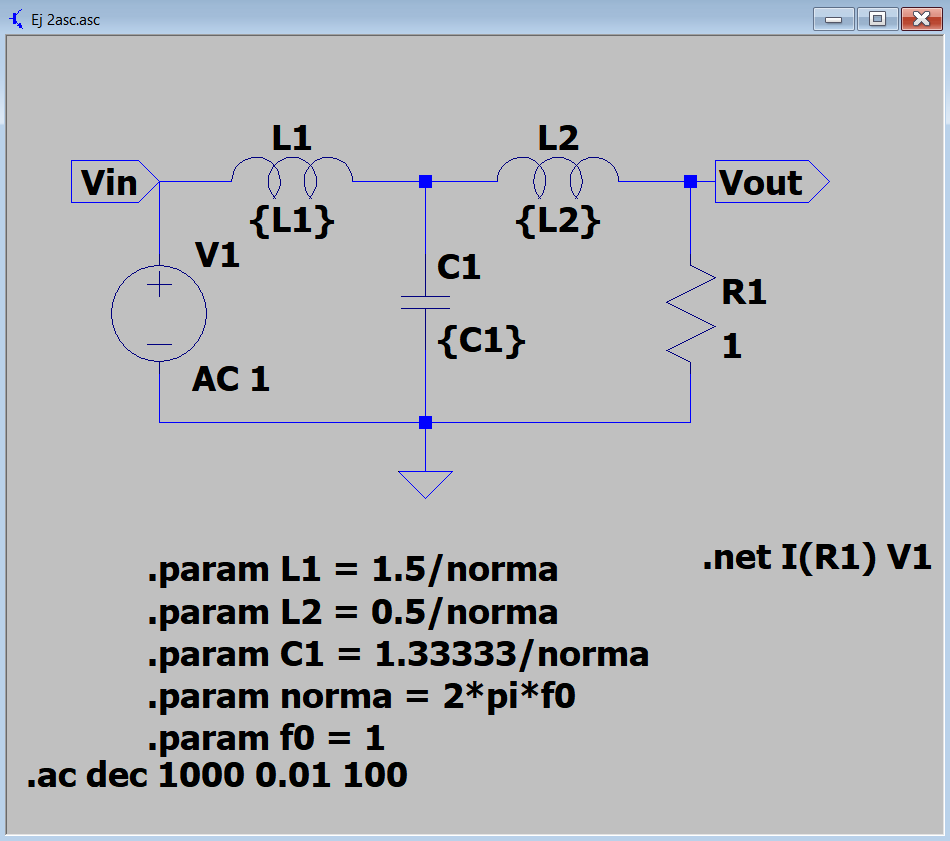

Nuevamente usaremos la directiva de spice para obtener la impedancia de entrada del circuito, para esto usamos ".net I(R1) V1".

El resultado de la simulación es el siguiente:

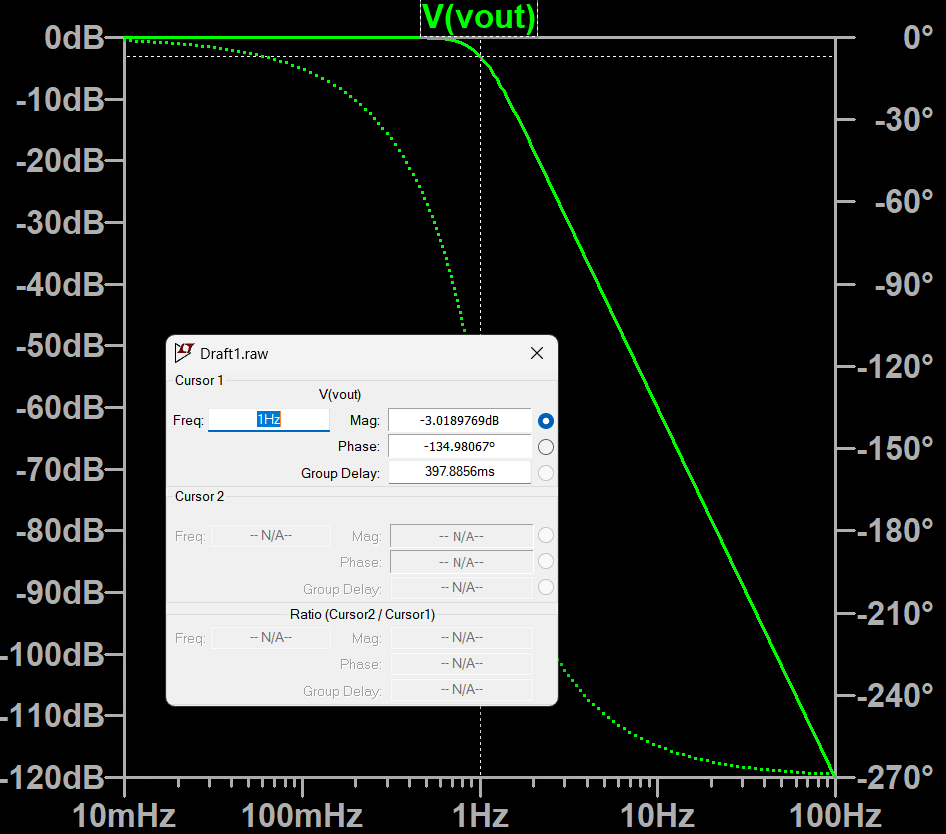

En la proxima imágen se realizo un acercamiento a la zona de interes.

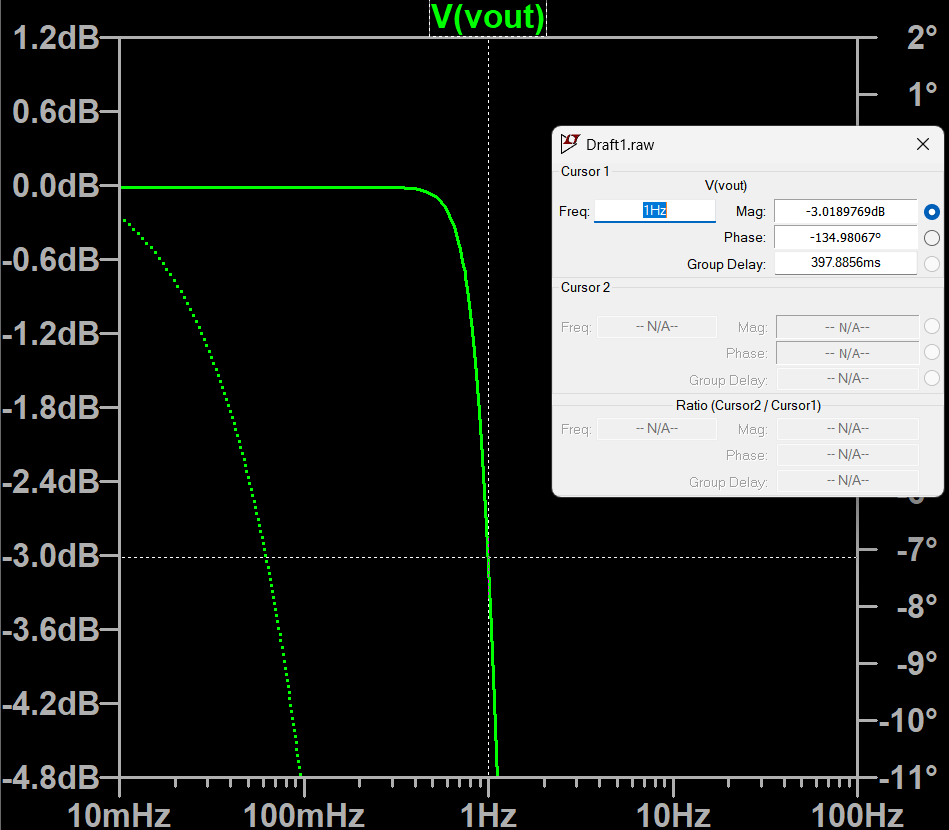

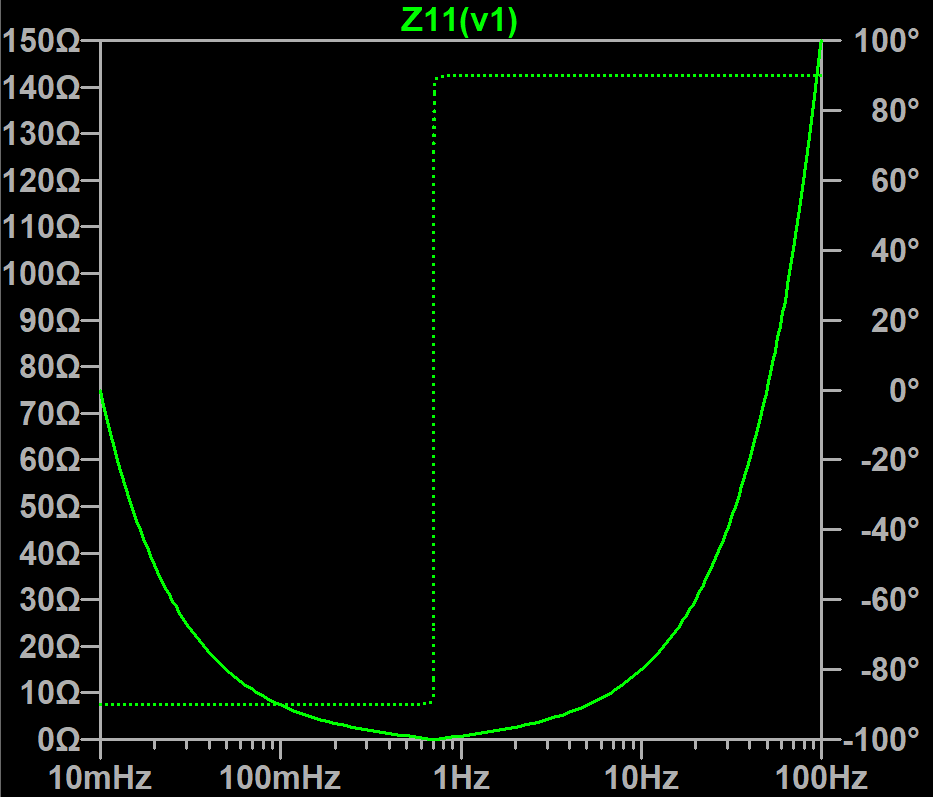

Podemos ver lo útil y poderosa que es la herramienta, algo que antes nos llevaba untiempo considerable como realizar el diagrama de admitancias e impedancias, ahora podemos encontrarlo facilmente utilizando el comando o directiva de spice ".net"